<a href="https://colab.research.google.com/github/Shaunlipy/Pytorch_operations/blob/main/Pytorch_Einsum_Einops.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np
print(torch.__version__)

1.8.1+cu101


In [ ]:
# 1
a = torch.rand(2, 3)
b = torch.rand(3, 4)
c = torch.einsum('ik,kj -> ij', [a, b])
d = torch.mm(a, b) # c equivalent to d
print(c)
print(d)

tensor([[0.6971, 0.7975, 0.5028, 0.4894],
        [0.5703, 0.5612, 0.1938, 0.4922]])
tensor([[0.6971, 0.7975, 0.5028, 0.4894],
        [0.5703, 0.5612, 0.1938, 0.4922]])


In [ ]:
# 2
a = torch.randn(2, 3, 5, 7, 9)
# i = 7, j = 9
b = torch.einsum('...ij -> ...ji', [a])
c = a.permute(0, 1, 2, 4, 3)
print(b.shape)
print(c.shape)

torch.Size([2, 3, 5, 9, 7])
torch.Size([2, 3, 5, 9, 7])


In [ ]:
# 3
a = torch.arange(9).reshape(3, 3)

b = torch.einsum('ii -> i', [a])
c = torch.diagonal(a, 0)

print(b)
print(c)

tensor([0, 4, 8])
tensor([0, 4, 8])


In [ ]:
# 4
a = torch.arange(6).reshape(2, 3)

b = torch.einsum('ij -> ji', [a])
c = torch.transpose(a, 0, 1)

print(b)
print(c)

tensor([[0, 3],
        [1, 4],
        [2, 5]])
tensor([[0, 3],
        [1, 4],
        [2, 5]])


In [ ]:
# 5 
a = torch.arange(6).reshape(2, 3)

b = torch.einsum('ij ->', [a])
c = torch.sum(a)

print(b)
print(c)

tensor(15)
tensor(15)


In [ ]:
# 6
a = torch.arange(6).reshape(2, 3)

b = torch.einsum('ij ->j', [a])
c = torch.sum(a, dim=0)

print(b)
print(c)

tensor([3, 5, 7])
tensor([3, 5, 7])


In [ ]:
# 7
a = torch.arange(6).reshape(2, 3)
b = torch.arange(3)

c = torch.einsum('ik,k -> i', [a, b])
d = torch.mv(a, b)
e = torch.einsum('ik,k', [a, b])

print(c)
print(d)
print(e)

tensor([ 5, 14])
tensor([ 5, 14])
tensor([ 5, 14])


In [ ]:
# 8 
a = torch.arange(6).reshape(2, 3)
b = torch.arange(15).reshape(3, 5)

c = torch.einsum('ik,kj->ij', [a, b])
d = torch.mm(a,b)
e = torch.einsum('ik,kj', [a, b])

print(c)
print(d)
print(e)

tensor([[ 25,  28,  31,  34,  37],
        [ 70,  82,  94, 106, 118]])
tensor([[ 25,  28,  31,  34,  37],
        [ 70,  82,  94, 106, 118]])
tensor([[ 25,  28,  31,  34,  37],
        [ 70,  82,  94, 106, 118]])


In [ ]:
# 9
a = torch.arange(3)
b = torch.arange(3, 6)

c = torch.einsum('i,i ->', [a, b])
d = torch.einsum('i,i', [a, b])
e = torch.dot(a, b)

print(c)
print(d)
print(e)

tensor(14)
tensor(14)
tensor(14)


In [ ]:
# 10
a = torch.arange(6).reshape(2, 3)
b = torch.arange(6, 12).reshape(2, 3)

c = torch.einsum('ij,ij->', [a,b])
d = torch.einsum('ij, ij', [a, b])
e = (a * b).sum()

print(c)
print(d)
print(e)

tensor(145)
tensor(145)
tensor(145)


In [ ]:
# 11
a = torch.arange(3)
b = torch.arange(3, 7)

c = torch.einsum('i,j->ij', [a,b])
d = torch.einsum('i,j', [a, b])
e = torch.outer(a, b)

print(c)
print(d)
print(e)

tensor([[ 0,  0,  0,  0],
        [ 3,  4,  5,  6],
        [ 6,  8, 10, 12]])
tensor([[ 0,  0,  0,  0],
        [ 3,  4,  5,  6],
        [ 6,  8, 10, 12]])
tensor([[ 0,  0,  0,  0],
        [ 3,  4,  5,  6],
        [ 6,  8, 10, 12]])


In [ ]:
# 12
a = torch.randn(2, 3, 5)
b = torch.randn(2, 5, 4)

c = torch.einsum('ijk,ikl -> ijl', [a, b])
d = torch.bmm(a, b)

print((c==d).all())

tensor(True)


In [ ]:
# 13
a = torch.randn(2, 3, 5, 7)
b = torch.randn(11, 13, 3, 17, 5)

c = torch.einsum('pqrs,tuqvr -> pstuv', [a, b])
d = torch.tensordot(a, b, dims=([1, 2], [2, 4]))

print((c==d).all())

tensor(True)


In [ ]:
# 14
a = torch.randn(2, 3)
b = torch.randn(5, 3, 7)
c = torch.randn(2, 7)

d = torch.einsum('ik, jkl, il -> ij', [a, b, c])
_m = torch.nn.Bilinear(3, 7, 5, bias=False)
_m.weight.data = b
e = _m(a, c).detach()

print(d.shape)
print((d==e).all())

torch.Size([2, 5])
tensor(True)


In [1]:
# EinOPS
!pip install einops

In [2]:
from einops import rearrange, reduce, repeat
import cv2
import requests
from io import BytesIO
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
%matplotlib inline

In [3]:
def get_imgs(num_img):
  url = 'https://picsum.photos/64/64'
  res = []
  for i in range(num_img):
    response = requests.get(url)
    res.append(plt.imread(BytesIO(response.content), format='JPG'))
  return res

ims = get_imgs(6)

In [4]:
ims = np.asarray(ims)
print(ims.shape, ims.dtype)

(6, 64, 64, 3) uint8


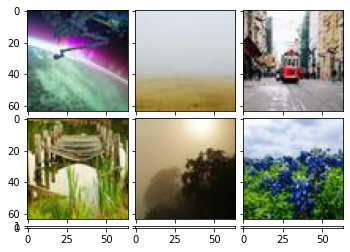

In [5]:
fig = plt.figure()
grid = ImageGrid(fig, 111, nrows_ncols=(3, 3), axes_pad=0.1)
for ax, im in zip(grid, ims):
  ax.imshow(im)
plt.show()

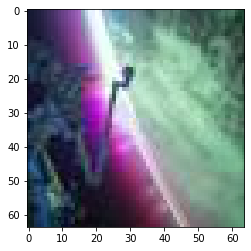

In [6]:
# 1
plt.imshow(rearrange(ims[0], 'h w c -> w h c'))


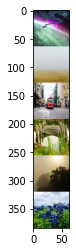

In [7]:
plt.imshow(rearrange(ims, 'b h w c -> (b h) w c'))

(64, 384, 3)


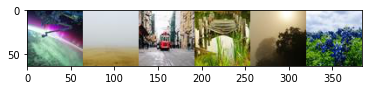

In [8]:
plt.imshow(rearrange(ims, 'b h w c -> h (b w) c'))
print(rearrange(ims, 'b h w c -> h (b w) c').shape)

In [9]:
rearrange(ims, 'b h w c -> (b h w c)').shape

(73728,)

In [10]:
# 2 Decompose axis

rearrange(ims, '(b1 b2) h w c -> b1 b2 h w c ', b1=2).shape

(2, 3, 64, 64, 3)

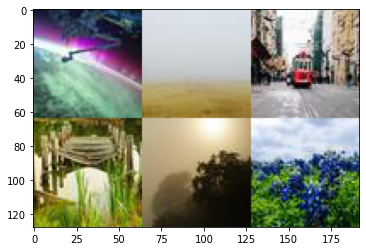

In [11]:
plt.imshow(rearrange(ims, '(b1 b2) h w c -> (b1 h) (b2 w) c ', b1=2))

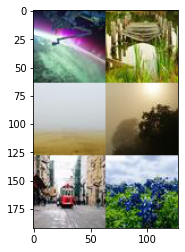

In [12]:
plt.imshow(rearrange(ims, '(b1 b2) h w c -> (b2 h) (b1 w) c ', b1=2))

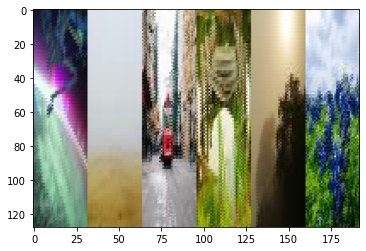

In [13]:
plt.imshow(rearrange(ims, 'b h (w w2) c -> (h w2) (b w) c', w2=2))

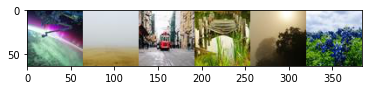

In [14]:
# Note the order matters 1
plt.imshow(rearrange(ims, 'b h w c -> h (b w) c'))

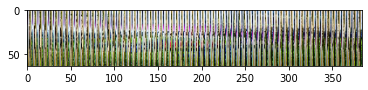

In [15]:
# Note the order matters 2
plt.imshow(rearrange(ims, 'b h w c -> h (w b) c'))

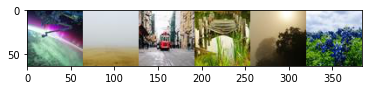

In [16]:
# Note the order matters 1
plt.imshow(rearrange(ims, '(b1 b2) h w c -> h (b1 b2 w) c ', b1=2))

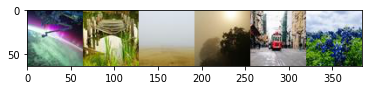

In [17]:
# Note the order matters 2
plt.imshow(rearrange(ims, '(b1 b2) h w c -> h (b2 b1 w) c ', b1=2))

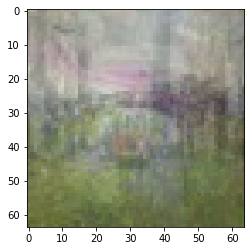

In [18]:
# 2 Reduce
plt.imshow(reduce(ims.astype(np.float), 'b h w c -> h w c', 'mean').astype(np.uint8))

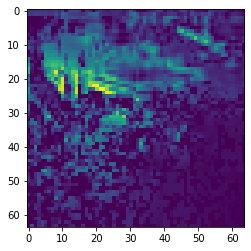

In [20]:
# besides mean, there are also min, max, sum, prod
plt.imshow(reduce(ims.astype(np.float), 'b h w c -> h w', 'min').astype(np.uint8))

(32, 192, 3)


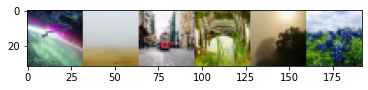

In [29]:
plt.imshow(reduce(ims.astype(np.float), 'b (h h2) (w w2) c -> h (b w) c', 'mean', h2=2, w2=2).astype(np.uint8))
print(reduce(ims.astype(np.float), 'b (h h2) (w w2) c -> h (b w) c', 'mean', h2=2, w2=2).shape)

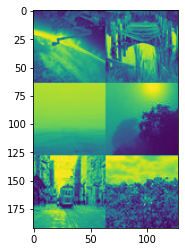

In [34]:
plt.imshow(reduce(ims.astype(np.float), '(b1 b2) h w c -> (b2 h) (b1 w)', 'mean', b1=2).astype(np.uint8))

In [35]:
x = rearrange(ims, 'b h w c -> b 1 h w 1 c') # functionality of numpy.expand_dims
print(x.shape)
print(rearrange(x, 'b 1 h w 1 c -> b h w c').shape) # functionality of numpy.squeeze

(6, 1, 64, 64, 1, 3)
(6, 64, 64, 3)


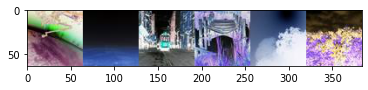

In [36]:
# compute max in each image individually, then show a difference 
x = reduce(ims.astype(float), 'b h w c -> b () () c', 'max') - ims
plt.imshow(rearrange(x, 'b h w c -> h (b w) c').astype(np.uint8))

(384, 3072, 3)


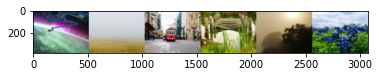

In [40]:
plt.imshow(repeat(ims, 'b h w c -> (h h2) (b w w2) c', h2=6, w2=8))
print(repeat(ims, 'b h w c -> (h h2) (b w w2) c', h2=6, w2=8).shape)

In [71]:
# Also works for tensor
import torch
temp = torch.from_numpy(ims)

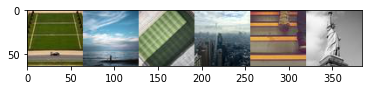

In [70]:
plt.imshow(rearrange(temp, '(b1 b2) h w c -> h (b2 b1 w) c ', b1=2))

In [24]:
temp_2 = torch.from_numpy(ims).cuda()

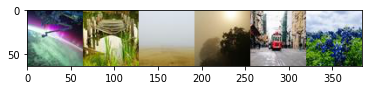

In [28]:
plt.imshow(rearrange(temp_2.cpu(), '(b1 b2) h w c -> h (b2 b1 w) c ', b1=2))